## Wrangle and Analyze Data - WeRateDogs

#### With this project we are going to wrangle the WeRateDogs Twitter data to carry out trustworthy analyses. In addition to the basic info we can get from the Twitter archive, we will need to gather, asses and clean the Twitter data.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import json
import re
import requests
import tweepy
from datetime import datetime,timedelta
from scipy import stats
import matplotlib.pyplot as plt
import webbrowser
import statsmodels.api as sm
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Gathering Data

### Twitter archive

In [2]:
# Read .csv file as a Pandas DataFrame
archive = pd.read_csv("twitter-archive-enhanced.csv")

### Image predictions

In [3]:
# Download tsv file programmatically from website using request library
url_image_predictions="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url_image_predictions)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### Tweets

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Connect to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# Create list of twitter ids
tweet_ids = list(archive.tweet_id)

# Twitter query using tweet_id info from archive
tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error: " + str(tweet))

Error: 888202515573088257
Error: 873697596434513921
Error: 872668790621863937
Error: 869988702071779329
Error: 866816280283807744
Error: 861769973181624320
Error: 845459076796616705
Error: 842892208864923648
Error: 837012587749474308
Error: 827228250799742977
Error: 812747805718642688
Error: 802247111496568832
Error: 775096608509886464
Error: 770743923962707968
Rate limit reached. Sleeping for: 735
Error: 754011816964026368
Error: 680055455951884288
Rate limit reached. Sleeping for: 734


In [6]:
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, sort_keys = True, indent=4, ensure_ascii = False)

In [7]:
tweet = pd.read_json('tweet_json.txt',orient='index')

## Assessing Data

#### Here below visual and programmatic assessment for quality and tidiness issues of the 3 dataframes: *archive*, *image_predictions* and *tweets*
#### Objective: to find at least 8 quality issues and at least 2 tidiness issues in this dataset.

#### Archive:

In [8]:
archive.shape

(2356, 17)

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### image_predictions:

In [12]:
image_predictions.shape

(2075, 12)

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### tweet:

In [16]:
tweet.shape

(2340, 30)

In [17]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [18]:
tweet.sample(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1992-05-03 02:19:18.691414016,NaN,NaN,2016-03-02 02:43:09,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/81...,2351,0,NaN,704859558691414016,704859558691414016,...,NaN,NaN,NaN,579,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,0,"{'contributors_enabled': False, 'created_at': ..."
1994-01-03 15:41:04.640446465,NaN,NaN,2016-07-25 16:21:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/AV...,4807,0,NaN,757611664640446464,757611664640446464,...,NaN,NaN,NaN,1201,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-05-20 10:58:50.913071104,NaN,NaN,2015-12-09 23:47:22,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/KN...,662,0,NaN,674737130913071104,674737130913071104,...,NaN,NaN,NaN,96,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,0,"{'contributors_enabled': False, 'created_at': ..."


In [19]:
tweet.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2340.000000,2340.0,0.0,2.340000e+03,2.340000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2340.000000,2205.0,2205.0,2.600000e+01,2.600000e+01,2340.000000,2340.0,2340.000000
mean,NaN,NaN,7941.805128,0.0,NaN,7.422176e+17,7.422176e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013248,0.0,0.0,8.113972e+17,8.113972e+17,2918.194444,0.0,0.105556
std,NaN,NaN,12301.367669,0.0,NaN,6.832564e+16,6.832564e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114359,0.0,0.0,6.295843e+16,6.295843e+16,4916.590607,0.0,0.307334
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1371.000000,0.0,NaN,6.783394e+17,6.783394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,584.750000,0.0,0.000000
50%,NaN,NaN,3451.500000,0.0,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1361.000000,0.0,0.000000
75%,NaN,NaN,9721.250000,0.0,NaN,7.986954e+17,7.986954e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3399.000000,0.0,0.000000
max,NaN,NaN,163857.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,83327.000000,0.0,1.000000


### Quality issues:
>##### 1) In dataframe "archive" there are missing data: some of the names of the dogs, in the column "name", are not real names (eg. "an", "by", etc). They can be recognized as they start with a lowercase letter. We will need to use "str.islower" function to identify and fix them.
>##### 2) In dataframe "archive", we would need to remove all the rows that are not original tweets: if the column 'retweeted_status_id' is not null it means that is a retweet and those rows should be removed. We have 181 non-null instances that will have to be removed.
>##### 3) In "archive" dataframe, "tweet_id" column needs to be converted from a number to string value.
>##### 4) In the "archive" dataframe, we have not a constant value in the "rating_denominator", which makes a real rating difficult to do just looking at the numerator value.
>##### 5) In dataframe "image_predictions", not all the values of the columns "p1", "p2" and "p3" starts with a capital letter. Capitalize them with "str.capitalize" function to achieve consistency.
>##### 6) In dataframe "image_predictions", in the coulmns "p1", "p2" and "p3", remove the underscore "_" between the words.
>##### 7) In the dataframe 'image_predictions', convert 'tweet_id' from number to string data type to achieve consistency
>##### 8) In dataframe "tweet", convert "id" column from a number to a string.
>##### 9) In dataframe "tweet", rename the column "id" to "tweet_id" to achieve consistency with the other two dataframes.
>##### 10) In dataframe "tweet", 167 records have a non-null "retweeted_status", therefore they will need to be removed. 

### Tidyness issues:
>##### 1) In "archive" dataframe, convert the "timestamp" column from string to datetime object, then split it into 2 seperate columns "date" and "time".
>##### 2) In "archive" dataframe, there is one variable in four columns (doggo, floofer, pupper, and puppo), so we will need to combine each dog stage column into a single column named "stage".
>##### 3) In "archive" dataframe, drop columns that are not required for the analysis.
>##### 4) Merge all 3 dataframes into a unique dataframe

## Cleaning Data

In [20]:
# create copy of original dataframes 
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_clean = tweet.copy()

### Quality

####  1) In dataframe "archive" there are missing data: some of the names of the dogs, in the column "name", are not real names (eg. "an", "by", etc). They can be recognized as they start with a lowercase letter. We will need to use "str.islower" function to identify and fix them.

#### Define

Find rows where the value of 'name' is lowercase with the function str.islower, indicating that it's not an actual name, and replace it with 'None'

#### Code

In [21]:
no_name = archive_clean.loc[(archive_clean['name'].str.islower())]
no_name_list = no_name['text'].tolist()

# iterate replace "None" where name is lowercase
for i in no_name_list:
    archive_clean.loc[archive_clean.text == i, 'name'] = "None"

#### Test

In [22]:
len(archive_clean[(archive_clean['name'].str.islower())]) == 0  # True if all names start with Upper case

True

#### 2) In dataframe "archive", we would need to remove all the rows that are not original tweets: if the column 'retweeted_status_id' is not null it means that is a retweet and those rows should be removed. We have 181 non-null instances that will have to be removed.

#### Define

Drop tweets that have a "retweeted_status_id" not null because the tweet is a retweet, thus not original.

#### Code

In [23]:
# remove these values from the dataframe using the drop() function
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

#### Test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 3) In "archive" dataframe, "tweet_id" column needs to be converted from a number to string value.

#### Define

Convert 'tweet_id' column from number to string using .astype(string) function

#### Code

In [25]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

#### Test

In [26]:
type(archive_clean['tweet_id'].iloc[0])

str

#### 4) In the "archive" dataframe, we have not a constant value in the "rating_denominator", which makes a real rating difficult to do just looking at the numerator value.

#### Define

As we don't have a consistent value for the column "rating_denominator", we need a new column to normalize the dog ratings, which will be the ratio between "rating_numerator" and "rating_denominator"

In [27]:
archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Code

In [28]:
archive_clean['dog_rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

#### Test

In [29]:
archive_clean.dog_rating.head(5)

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: dog_rating, dtype: float64

#### 5) In dataframe "image_predictions", not all the values of the columns "p1", "p2" and "p3" starts with a capital letter. Capitalize them with "str.capitalize" function to achieve consistency.

#### Define

Capitalize columns 'p1', 'p2' and 'p3' to achieve consistenci, using str.capitalise function

#### Code

In [30]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.capitalize()
image_predictions_clean.p2 = image_predictions_clean.p2.str.capitalize()
image_predictions_clean.p3 = image_predictions_clean.p3.str.capitalize()

#### Test


In [31]:
image_predictions_clean.p1.head()

0    Welsh_springer_spaniel
1                   Redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        Miniature_pinscher
Name: p1, dtype: object

In [32]:
image_predictions_clean.p2.head()

0                Collie
1    Miniature_pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [33]:
image_predictions_clean.p3.head()

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             Bloodhound
3     Miniature_pinscher
4               Doberman
Name: p3, dtype: object

#### 6) In dataframe "image_predictions", in the columns "p1", "p2" and "p3", remove the underscore "_" between the words

#### Define

For all the 3 columns, use the str.replace function to replace the underscore "_" with a space " ".

#### Code

In [34]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ')

#### Test

In [35]:
image_predictions_clean.p1.head()

0    Welsh springer spaniel
1                   Redbone
2           German shepherd
3       Rhodesian ridgeback
4        Miniature pinscher
Name: p1, dtype: object

In [36]:
image_predictions_clean.p2.head()

0                Collie
1    Miniature pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [37]:
image_predictions_clean.p3.head()

0      Shetland sheepdog
1    Rhodesian ridgeback
2             Bloodhound
3     Miniature pinscher
4               Doberman
Name: p3, dtype: object

#### 7) In the dataframe 'image_predictions', convert 'tweet_id' from number to string data type to achieve consistency.

#### Define

Use .astype(str) function to convert the column 'tweet_id' from number to string

#### Code

In [38]:
type(image_predictions_clean.tweet_id[0]) 

numpy.int64

In [39]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test

In [40]:
type(image_predictions_clean.tweet_id[0]) 

str

#### 8) In dataframe "tweet", convert "id" column from a number to a string

#### Define

Let's use the astype(str) function to convert column "id" from number to string 

#### Code

In [41]:
tweet_clean.id = tweet_clean.id.astype(str)

#### Test

In [42]:
type(tweet_clean.id[0]) 

str

#### 9) In dataframe "tweet", rename the column "id" to "tweet_id" to achieve consistency with the other two dataframes

#### Define

Let's use the rename function to rename the column 'id' to 'tweet_id'

#### Code

In [43]:
tweet_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [44]:
tweet_clean.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."


In [45]:
# further check for name and datatype consistency
print(type(archive_clean['tweet_id'][0]))
print(type(image_predictions_clean['tweet_id'][0]))
print(type(tweet_clean['tweet_id'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


#### 10) In dataframe "tweet", 167 records have a non-null "retweeted_status", therefore they will need to be removed

#### Define

Let's use the function .drop() to drop the columns where the condition: "retweeted_status is null" is not met

#### Code

In [46]:
list_index = tweet_clean[tweet_clean.retweeted_status.isnull()== False].index

In [47]:
tweet_clean.drop(list_index, inplace=True)

#### Test

In [48]:
len(tweet_clean[tweet_clean.retweeted_status.isnull()== False])==0 # True if the 'retweeted_status' has only null values 

True

### Tidyness

#### 1) In "archive" dataframe, convert the "timestamp" column from string to datetime object, then split it into 2 seperate columns "date" and "time".

#### Define

Change 'timestamp' column from string to datetime object using timestamp function, then split it in 2 columns: 'date' & 'time' using time.strftime function

In [49]:
# current data type for timestamp
type(archive_clean.timestamp.iloc[0])

str

#### Code

In [50]:
# use pd.to_datetime to convert 'timestamp' from string to datetime object
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# create 2 new columns 'date' and 'time' based on 'timestamp'
archive_clean['date'] = archive_clean.timestamp.apply(lambda time: time.strftime('%m-%d-%Y'))
archive_clean['time'] = archive_clean.timestamp.apply(lambda time: time.strftime('%H:%M'))

#### Test

In [51]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_rating,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3,08-01-2017,00:17


In [52]:
type(archive_clean.date.iloc[0])

str

In [53]:
type(archive_clean.time.iloc[0])

str

#### 2) In "archive" dataframe, there is one variable in four columns (doggo, floofer, pupper, and puppo), so we will need to combine each dog stage column into a single column named "stage"

#### Define

We are going to create a new column called "stage", fill it with the info extracted from the above mentioned 4 columns with the str.ectract function, and finally drop these 4 columns.

#### Code

In [54]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
archive_clean['stage'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [55]:
# Remove columns that are no longer needed
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [56]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rating,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,08-01-2017,16:23,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,08-01-2017,00:17,NaN


#### 3) In "archive" dataframe, drop columns that are not required for the analysis

In [57]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_rating,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,08-01-2017,16:23,NaN


#### Define

Remove unwanted columns from archive_clean

#### Code

In [58]:
# remove unwanted columns from archive_clean 
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','timestamp','source','text',
                    'retweeted_status_id','retweeted_status_user_id',
                    'retweeted_status_timestamp','expanded_urls',
                    ], axis=1,inplace=True)

#### Test

In [59]:
archive_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,dog_rating,date,time,stage
0,892420643555336193,13,10,Phineas,1.3,08-01-2017,16:23,NaN
1,892177421306343426,13,10,Tilly,1.3,08-01-2017,00:17,NaN
2,891815181378084864,12,10,Archie,1.2,07-31-2017,00:18,NaN
3,891689557279858688,13,10,Darla,1.3,07-30-2017,15:58,NaN
4,891327558926688256,12,10,Franklin,1.2,07-29-2017,16:00,NaN


#### 4) Merge all 3 dataframes into a unique dataframe

#### Define

Use .merge() function to merge the 3 dataframes, using "inner" as merging type and  "tweet_id" as the column to merge on.

#### Code

In [60]:
# perform nested merge between the 3 dataframes
twitter_archive_master = pd.merge(pd.merge(archive_clean,image_predictions_clean, on='tweet_id', how='inner'),tweet_clean, on='tweet_id', how='inner')

#### Test

In [61]:
twitter_archive_master.head(2)

,tweet_id,rating_numerator,rating_denominator,name,dog_rating,date,time,stage,jpg_url,img_num,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,891815181378084864,12,10,Archie,1.2,07-31-2017,00:18,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,NaN,NaN,NaN,4054,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1,891689557279858688,13,10,Darla,1.3,07-30-2017,15:58,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,NaN,NaN,NaN,8425,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."


 ## Storing, Analyzing, and Visualizing Data

#### Save the final datafrime to a .csv file in the working directory

In [62]:
twitter_archive_master.to_csv('twitter_archive_master.csv') 

### Data Analysis

#### At the moment the dataframe "twitter_archive_master" is composed by 49 columns and not all of them are relevant for the data analysis I'm going to carry out. Let's create a new dataframe named "df" with only the meaningful column for the data analysis.

In [63]:
# Let's visualize all the columns
twitter_archive_master.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name',
       'dog_rating', 'date', 'time', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [64]:
df = twitter_archive_master[['tweet_id', 'name', 'date', 'time', 'jpg_url', 'p1', 'p1_conf','dog_rating', 'favorite_count', 'retweet_count','stage', 'text']]
df.head(2)

,tweet_id,name,date,time,jpg_url,p1,p1_conf,dog_rating,favorite_count,retweet_count,stage,text
0,891815181378084864,Archie,07-31-2017,00:18,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.2,24532,4054,NaN,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,Darla,07-30-2017,15:58,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,1.3,41288,8425,NaN,This is Darla. She commenced a snooze mid meal...


#### As mentioned in the Cleaning phase, with the Quality issue number 4) fixed, we can have a reliable indicator of the dog rating looking at the column "dog_rating". Although I'm sure they are all great dogs, we want to consider as "best dogs" the ones with a normalised rating with a value of 1 standard deviation above the mean.

### First insight
#### It's always very important to investigate the outliers, to understand the reasons why they have those values and to understand if they are appropriate for the analysis and the model we are building. So let's investigate the outliers in term of dog_rating first

In [101]:
df.describe()

,p1_conf,dog_rating,favorite_count,retweet_count
count,1298.000000,1298.000000,1298.000000,1298.000000
mean,0.586720,1.223597,8131.353621,2452.000000
std,0.273508,5.037868,11383.802323,3967.519612
min,0.044333,0.100000,78.000000,11.000000
25%,0.354689,1.000000,1678.500000,561.000000
50%,0.576936,1.100000,3748.000000,1224.500000
75%,0.836617,1.200000,10032.250000,2901.000000
max,1.000000,177.600000,126672.000000,60768.000000


In [65]:
df.dog_rating.value_counts()

1.000000      303
1.200000      290
1.100000      253
1.300000      157
0.900000       97
0.800000       64
0.700000       35
0.600000       22
0.500000       20
1.400000       18
0.300000       13
0.400000       12
0.200000        6
0.100000        3
3.428571        1
177.600000      1
42.000000       1
7.500000        1
2.700000        1
Name: dog_rating, dtype: int64

Let's open the "jpg_url" links for the datapoints with dog_rating equal or higher then 2.7, as they are only 5 and would greatly increase the variability.

In [66]:
outliers= df.query('dog_rating >= 2.7')
outliers[['dog_rating','jpg_url']].sort_values(by='dog_rating',ascending=False)

,dog_rating,jpg_url
451,177.600000,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1100,42.000000,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
296,7.500000,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
223,3.428571,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
330,2.700000,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg


In [67]:
# dog with rating 177
webbrowser.open("https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg")
df.iloc[451]
# lovely dog, but such a high rating is probably due to irrationality 
# due to the special patriotism in a special day in the USA (4t of July is Indipendence Day), 
# therefore I believe this value would be misleading for the analysis

tweet_id                                         749981277374128128
name                                                        Atticus
date                                                     07-04-2016
time                                                          15:00
jpg_url             https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
p1                                                          Bow tie
p1_conf                                                    0.533941
dog_rating                                                    177.6
favorite_count                                                 5364
retweet_count                                                  2620
stage                                                           NaN
text              This is Atticus. He's quite simply America af....
Name: 451, dtype: object

In [68]:
# dog with rating 42
webbrowser.open("https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg")
# this is "another" dog(g), great singer but I think it's not appropriate for 
# the analysis, therefore this record will be removed

True

In [69]:
# dog with rating 7.5
webbrowser.open("https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg")
# lovely dog, but with a rating incompatible with the distribution

True

In [70]:
# dog with rating 3.428571
webbrowser.open("https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg")
# lovely dog, but with a rating incompatible with the distribution

True

In [71]:
# dog with rating 2.7
webbrowser.open("https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg")
# really lovely dog, that because of the appearence and the value, I've 
# decided, based on my discretion, to keep it for the analysis.

True

For the reasons mentioned above in the comments, I prefer to remove the outlier that go above 3.42 as there are only 4 datapoints that go beyond this value and they make the variability misleading. I'm going to create a new dataframe to fill with the records with a "dog_rating" under this value.

In [72]:
df_no_outliers = df.query('dog_rating < 3.42')
df_no_outliers.dog_rating.value_counts()

1.0    303
1.2    290
1.1    253
1.3    157
0.9     97
0.8     64
0.7     35
0.6     22
0.5     20
1.4     18
0.3     13
0.4     12
0.2      6
0.1      3
2.7      1
Name: dog_rating, dtype: int64

### Second insight
#### If we want to optimise the time, looking only at the very best dogs that are in the top 16% of the population (rating above "mean + 1 stddev"), we can look at the "jpg_url" of only those dogs.

In [73]:
mean = df_no_outliers.dog_rating.mean()
std = df_no_outliers.dog_rating.std()
print(mean , std)

1.04922720247 0.220829882421


In [74]:
minbestdogval = mean + std
minbestdogval

1.2700570848942481

In [75]:
best_dogs = df_no_outliers.query('dog_rating > 1.27')
best_dogs.head()

,tweet_id,name,date,time,jpg_url,p1,p1_conf,dog_rating,favorite_count,retweet_count,stage,text
1,891689557279858688,Darla,07-30-2017,15:58,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,1.3,41288,8425,NaN,This is Darla. She commenced a snooze mid meal...
3,891087950875897856,None,07-29-2017,00:08,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake bay retriever,0.425595,1.3,19837,3038,NaN,Here we have a majestic great white breaching ...
4,890729181411237888,None,07-28-2017,00:22,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,1.3,64018,18384,NaN,When you watch your owner call another dog a g...
5,890609185150312448,Zoey,07-27-2017,16:25,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,0.487574,1.3,27241,4175,NaN,This is Zoey. She doesn't want to be one of th...
6,890006608113172480,Koda,07-26-2017,00:31,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,1.3,30034,7144,NaN,This is Koda. He is a South Australian decksha...


#### However, it would be interesting also to investigate the dogs that had the lowest ratings, to understand the reason, if any.

In [83]:
df_no_outliers[['dog_rating','jpg_url','date']].sort_values(by='dog_rating',ascending=True).head()

,dog_rating,jpg_url,date
1233,0.1,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,11-20-2015
964,0.1,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,12-11-2015
1288,0.1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,11-16-2015
1218,0.2,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,11-21-2015
899,0.2,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,12-20-2015


In [84]:
# dog with rating 0.1
webbrowser.open("https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg")
# rated so low because it's a fan on a sofa, and not an actual dog

True

In [85]:
# dog with rating 0.1
webbrowser.open("https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg")
# rated so low because the lovely dog wasn't seen because perfectly camouflaged in the carpet.

True

In [86]:
df.iloc[964].text

"What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0"

In [87]:
# dog with rating 0.1
webbrowser.open("https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg")
# rated so low because it's not a dog, but a chicken

True

#### It seems that the lowest rating are so low because there aren't actual dogs in the pictures.

### Third insight and first Viz
#### It would make sense to assume that the rating is positively correlated with the number of "favorites", therefore let's calculate this correlation and let's visualize it with a scatter plot.

In [88]:
# Correlation coefficient calculation
df_no_outliers['dog_rating'].corr(df_no_outliers['favorite_count'])

0.38153093530898158

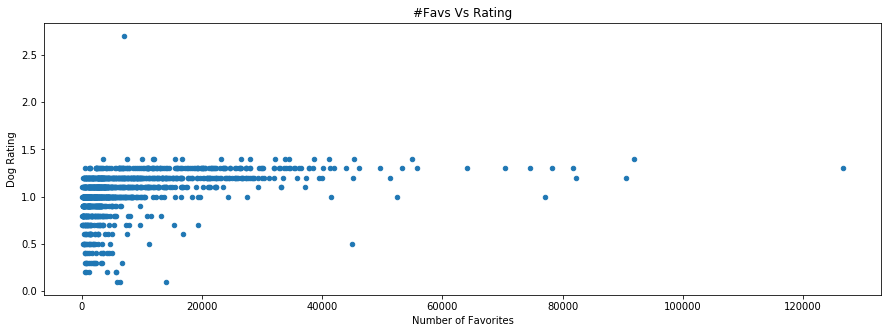

In [92]:
# Visualization with scatter plot using 
df_no_outliers.plot(x='favorite_count', y='dog_rating', kind='scatter', figsize=(15,5))
plt.xlabel('Number of Favorites')
plt.ylabel('Dog Rating')
plt.title('#Favs Vs Rating');

#### Surprisingly there is only a weak positive correlation (0.38) between the number of Favorites and the rating of the dogs. 
#### The reason might be that a dog not so beautiful attracts funny comments and are those comments that attract more favorites. 
#### If this theory is true, we should expect a positive correlation between the number of retweets (*retweet_count* column) and the number of favorites (*favorite_count* column). Let's calculate the correlation and let's visualize these two dimensions in a scatter plot.

In [90]:
# Correlation coefficient calculation
df_no_outliers['retweet_count'].corr(df_no_outliers['favorite_count'])

0.92585363952342958

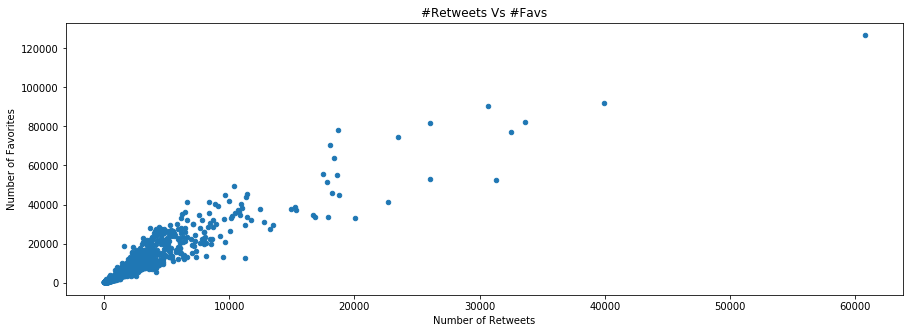

In [94]:
# Visualization with scatter plot using 
df_no_outliers.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15,5))
plt.ylabel('Number of Favorites')
plt.xlabel('Number of Retweets')
plt.title('#Retweets Vs #Favs');

#### The theory seems to find some statistic support, looking at the very strong correlation positive correlation (0.93) between these two variables.

### Fourth insight

#### We are going to investigate, with a Multiple Linear Regression, if and how the categorical variable "stage" impacts the rating. 

In [95]:
# create ad-hoc dataframe and add intercept column
dflinreg = df_no_outliers
dflinreg['intercept'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# in the "stage" column there are only 3 values, "floofer" is not there anymore
dflinreg.stage.value_counts()

pupper    151
doggo      38
puppo      20
Name: stage, dtype: int64

In [97]:
# create dummy variables for categorical variable "stage"
var_dummies = pd.get_dummies(dflinreg['stage'])
dflinreg = dflinreg.join(var_dummies)  
dflinreg.head(2)

,tweet_id,name,date,time,jpg_url,p1,p1_conf,dog_rating,favorite_count,retweet_count,stage,text,intercept,doggo,pupper,puppo
0,891815181378084864,Archie,07-31-2017,00:18,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.2,24532,4054,NaN,This is Archie. He is a rare Norwegian Pouncin...,1,0,0,0
1,891689557279858688,Darla,07-30-2017,15:58,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,1.3,41288,8425,NaN,This is Darla. She commenced a snooze mid meal...,1,0,0,0


In [98]:
# using value "puppo" as baseline for the categorical variable "stage"
lm = sm.OLS(dflinreg['dog_rating'], dflinreg[['intercept', 'doggo', 'pupper']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dog_rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.024
Date:                Sun, 10 Feb 2019   Prob (F-statistic):              0.133
Time:                        16:10:46   Log-Likelihood:                 120.83
No. Observations:                1294   AIC:                            -235.7
Df Residuals:                    1291   BIC:                            -220.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0456      0.007    157.520      0.000       1.033       1.059
doggo          0.0702      0.036      1.928      0.054      -0.001       0.142
pupper         0.0133      0.019      0.696      0.486      -0.024       0.051
==============================================================================
Omnibus:                      303.126   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1436.470
Skew:                          -1.017   Prob(JB):                         0.00
Kurtosis:                       7.744   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### An R-squared value of 0.003 indicates that only an extremely small part of the "dog_rating" value is explained by the "stage". Therefore I would say that this model is not usable to predict the rating. 
#### The p-values of the stages is higher then the alpha-level that is usually adopted to reject the null hypothesis (0.05), therefore we have enough confidence to affirm that the stage has no impact on the rating. 

### Fifth insight and second Viz
#### We are going to find out, for the dogs with the rating in the top 16%, how many they are for each type.

In [99]:
a = best_dogs['p1'].value_counts().sort_values(ascending=False)
a.head(20)

Golden retriever            24
Pembroke                    14
Labrador retriever          10
Chihuahua                    8
Samoyed                      7
Pug                          7
Chesapeake bay retriever     4
Chow                         4
Cardigan                     4
Siberian husky               3
Rottweiler                   3
Eskimo dog                   3
Cocker spaniel               3
French bulldog               3
Web site                     3
Basset                       3
Home theater                 2
Great pyrenees               2
Saluki                       2
German shepherd              2
Name: p1, dtype: int64

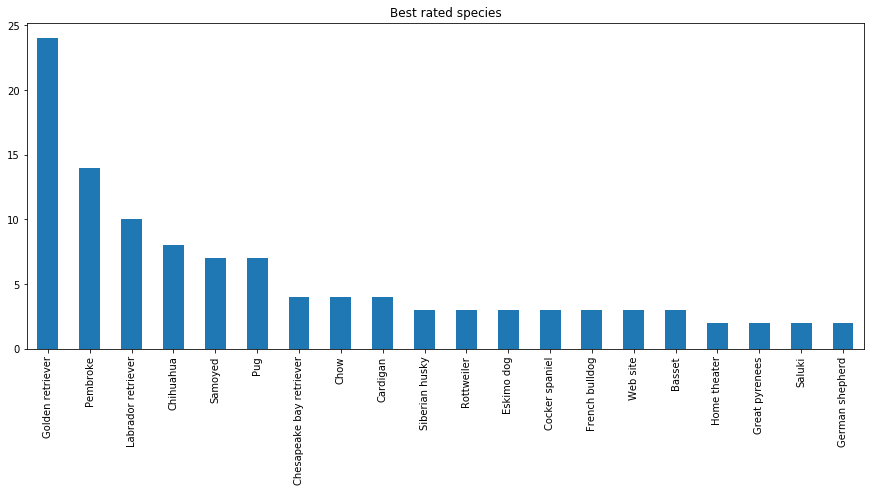

In [100]:
a.head(20).plot(kind = 'bar', figsize=(15,6));
plt.title('Best rated species');

#### The Golden retriever is by far the most appreciated type of dog, with Pembroke in the second position and Labrador retriever on the lowest step of the podium. Adopting one of those dogs would probably increase the likelyhood of getting a rating higher then average.

In [108]:
# Golden retriever average rating (1.154) higher then the population average rating (1.05)
df_no_outliers.query('p1 == "Golden retriever"').describe()

,p1_conf,dog_rating,favorite_count,retweet_count,intercept
count,94.000000,94.000000,94.000000,94.000000,94.0
mean,0.708203,1.154255,12087.170213,3398.978723,1.0
std,0.230509,0.141926,13667.758029,4439.805328,0.0
min,0.140394,0.500000,182.000000,51.000000,1.0
25%,0.591529,1.100000,3364.250000,1078.750000,1.0
50%,0.762772,1.200000,7646.000000,2088.000000,1.0
75%,0.888976,1.275000,15793.750000,3968.500000,1.0
max,0.993830,1.400000,81749.000000,26079.000000,1.0


In [109]:
df_no_outliers.query('p1 == "Golden retriever"').dog_rating.sort_values(ascending=False).head(2)

231    1.4
161    1.4
Name: dog_rating, dtype: float64

In [112]:
df.iloc[231]  # lovely Ollie

tweet_id                                         807621403335917568
name                                                          Ollie
date                                                     12-10-2016
time                                                          16:22
jpg_url             https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg
p1                                                 Golden retriever
p1_conf                                                    0.873233
dog_rating                                                      1.4
favorite_count                                                15532
retweet_count                                                  4018
stage                                                        pupper
text              This is Ollie Vue. He was a 3 legged pupper on...
Name: 231, dtype: object